# Proyek Analisis Data

## Pertanyaan

1. Bagaimana distribusi total penggunaan sepeda per tahun?
2. Bagaimana penggunaan sepeda bervariasi di antara musim yang berbeda? Musim apa yang memiliki penggunaan sepeda terbanyak?
3. Bagaimana penggunaan sepeda bervariasi di antara kondisi cuaca yang berbeda? Kondisi cuaca apa yang paling memengaruhi penggunaan sepeda?
4. Apakah ada perbedaan dalam jam puncak penggunaan sepeda antara hari kerja dan akhir pekan?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

#### Menilai Tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Tabel `hour_df`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [10]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan Tabel `day_df`

##### Mengembalikan nilai asli `temp`, `atemp`, `hum`, dan `windspeed`

In [12]:
def denormalize_temp(temp_norm):
    t_min = -8
    t_max = 39
    temp_actual = temp_norm * (t_max - t_min) + t_min
    return temp_actual

def denormalize_atemp(atemp_norm):
    t_min = -16
    t_max = 50
    atemp_actual = atemp_norm * (t_max - t_min) + t_min
    return atemp_actual

def denormalize_hum(hum_norm):
    return hum_norm * 100

def denormalize_windspeed(windspeed_norm):
    return windspeed_norm * 67

# Menerapkan fungsi denormalisasi
day_df['temp'] = day_df['temp'].apply(denormalize_temp)
day_df['atemp'] = day_df['atemp'].apply(denormalize_atemp)
day_df['hum'] = day_df['hum'].apply(denormalize_hum)
day_df['windspeed'] = day_df['windspeed'].apply(denormalize_windspeed)

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,15.283085,15.307363,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,8.603397,10.755438,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-5.220871,-10.781406,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.842925,6.297605,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,15.421651,16.124378,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,22.804575,24.167732,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,32.498349,39.499136,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Memperbaiki Tipe Data `dteday`

In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Mengubah angka pada kolom `month, season, weekday, weathersit, yr,` dan `workingday` menjadi keterangan yang sesuai

In [14]:
# Menampilkan angka unique
print(day_df['mnth'].unique())
print(day_df['season'].unique())
print(day_df['weekday'].unique())
print(day_df['weathersit'].unique())
print(day_df['yr'].unique())
print(day_df['workingday'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[1 2 3 4]
[6 0 1 2 3 4 5]
[2 1 3]
[0 1]
[0 1]


In [15]:
# Mengubah tipe data menjadi category
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')
    
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [16]:
# Konversi 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
day_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi 'yr' : 0:2011, 1:2012
day_df.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty/Cloudy','Light Rain/Snow','Heavy Rain/Snow'), inplace=True)

# Konversi 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi 'workingday' : 0:No, 1:Yes
day_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

# Konversi 'holiday' : 0:No, 1:Yes
day_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

C:\Users\USER\AppData\Local\Temp\ipykernel_16564\3095779287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_16564\3095779287.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.se

In [17]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Jan,No,Saturday,No,Misty/Cloudy,8.175849,7.999250,80.5833,10.749882,331,654,985
1,2,2011-01-02,Winter,2011,Jan,No,Sunday,No,Misty/Cloudy,9.083466,7.346774,69.6087,16.652113,131,670,801
2,3,2011-01-03,Winter,2011,Jan,No,Monday,Yes,Clear,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Winter,2011,Jan,No,Tuesday,Yes,Clear,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Winter,2011,Jan,No,Wednesday,Yes,Clear,2.666979,-0.868180,43.6957,12.522300,82,1518,1600


#### Membersihkan Tabel `hour_df`

##### Mengembalikan nilai asli `temp`, `atemp`, `hum`, dan `windspeed`

In [18]:
def denormalize_temp(temp_norm):
    t_min = -8
    t_max = 39
    temp_actual = temp_norm * (t_max - t_min) + t_min
    return temp_actual

def denormalize_atemp(atemp_norm):
    t_min = -16
    t_max = 50
    atemp_actual = atemp_norm * (t_max - t_min) + t_min
    return atemp_actual

def denormalize_hum(hum_norm):
    return hum_norm * 100

def denormalize_windspeed(windspeed_norm):
    return windspeed_norm * 67

# Menerapkan fungsi denormalisasi
hour_df['temp'] = day_df['temp'].apply(denormalize_temp)
hour_df['atemp'] = day_df['atemp'].apply(denormalize_atemp)
hour_df['hum'] = day_df['hum'].apply(denormalize_hum)
hour_df['windspeed'] = day_df['windspeed'].apply(denormalize_windspeed)

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,731.000000,731.000000,731.000000,731.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,710.304998,994.285975,6278.940629,855.092604,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,404.359650,709.858893,1424.290951,347.887941,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-253.380946,-727.572822,0.000000,100.516341,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,360.617452,399.641930,5200.000000,605.790550,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,716.817597,1048.208948,6266.670000,812.396775,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,1063.815049,1579.070312,7302.085000,1046.899890,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1519.422403,2590.942976,9725.000000,2278.001407,367.000000,886.000000,977.000000


##### Memperbaiki tipe data `dteday`

In [19]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        731 non-null    float64       
 11  atemp       731 non-null    float64       
 12  hum         731 non-null    float64       
 13  windspeed   731 non-null    float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Mengubah angka pada kolom `month, season, weekday, weathersit, yr,` dan `workingday` menjadi keterangan yang sesuai

In [20]:
# Menampilkan angka unique
print(hour_df['mnth'].unique())
print(hour_df['season'].unique())
print(hour_df['weekday'].unique())
print(hour_df['weathersit'].unique())
print(hour_df['yr'].unique())
print(hour_df['workingday'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[1 2 3 4]
[6 0 1 2 3 4 5]
[1 2 3 4]
[0 1]
[0 1]


In [21]:
# Mengubah tipe data menjadi category
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        731 non-null    float64       
 11  atemp       731 non-null    float64       
 12  hum         731 non-null    float64       
 13  windspeed   731 non-null    float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [22]:
# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
hour_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
hour_df.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty/Cloudy','Light Rain/Snow','Heavy Rain/Snow'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
hour_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

# Konversi nilai untuk 'holiday' : 0:No, 1:Yes
hour_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        731 non-null    float64       
 11  atemp       731 non-null    float64       
 12  hum         731 non-null    float64       
 13  windspeed   731 non-null    float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

C:\Users\USER\AppData\Local\Temp\ipykernel_16564\2336938640.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_16564\2336938640.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df.

In [23]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Jan,0,No,Saturday,No,Clear,376.264903,511.950500,8058.33,720.242094,3,13,16
1,2,2011-01-01,Winter,2011,Jan,1,No,Saturday,No,Clear,418.922902,468.887084,6960.87,1115.691571,8,32,40
2,3,2011-01-01,Winter,2011,Jan,2,No,Saturday,No,Clear,49.768076,-246.951820,4372.73,1114.659101,5,27,32
3,4,2011-01-01,Winter,2011,Jan,3,No,Saturday,No,Clear,57.800000,-147.996568,5904.35,719.568744,3,10,13
4,5,2011-01-01,Winter,2011,Jan,4,No,Saturday,No,Clear,117.348013,-73.299880,4369.57,838.994100,0,1,1


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [25]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
86,87,2011-03-28,Spring,2011,Mar,No,Monday,Yes,Clear,4.424356,0.999884,30.2174,14.217668,222,1806,2028
357,358,2011-12-24,Winter,2011,Dec,No,Saturday,No,Clear,6.217500,3.749972,54.2500,12.750368,155,856,1011
502,503,2012-05-17,Spring,2012,May,No,Thursday,Yes,Clear,19.886651,21.792458,52.0000,15.374825,1242,6142,7384
715,716,2012-12-16,Fall,2012,Dec,No,Sunday,No,Misty/Cloudy,9.037500,8.415908,83.8750,6.749714,538,3248,3786
559,560,2012-07-13,Summer,2012,Jul,No,Friday,Yes,Misty/Cloudy,26.388349,28.083578,48.5833,5.416950,1511,5988,7499


In [26]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,Jan,No,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,15.283085,15.307363,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,-5.220871,-10.781406,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,7.842925,6.297605,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,15.421651,16.124378,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,22.804575,24.167732,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,32.498349,39.499136,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [62]:
# Mengecek jumlah total penggunaan sepeda berdasarkan musim

day_df.groupby(by='season').agg({
    'cnt': ['mean', 'sum']
}).sort_values(by=('cnt', 'sum'), ascending = False)

C:\Users\USER\AppData\Local\Temp\ipykernel_16564\1081342939.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


cnt         
               mean      sum
season                      
Summer  5644.303191  1061129
Spring  4992.331522   918589
Fall    4728.162921   841613
Winter  2604.132597   471348

In [63]:
# Mengecek jumlah total penggunaan sepeda berdasarkan tahun

day_df.groupby(by='yr').agg({
    'cnt': 'sum'
}).sort_values(by=('cnt'), ascending = False)

,cnt
yr,
2012,2049576
2011,1243103


In [64]:
# Mengecek jumlah total penggunaan sepeda berdasarkan tahun dan musim

day_df.groupby(by=['season', 'yr']).agg({
    'cnt': ['min', 'max', 'mean', 'sum']
})

C:\Users\USER\AppData\Local\Temp\ipykernel_16564\3942669163.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['season', 'yr']).agg({


cnt                           
              min   max         mean     sum
season yr                                   
Winter 2011   431  3239  1666.666667  150000
       2012   441  7836  3531.296703  321348
Spring 2011   795  5805  3775.173913  347316
       2012  1027  8362  6209.489130  571273
Summer 2011  1115  6043  4464.361702  419650
       2012  4073  8714  6824.244681  641479
Fall   2011   627  5511  3664.460674  326137
       2012    22  8555  5791.865169  515476

In [66]:
# Mengecek jumlah penggunaan sepeda berdasarkan bulan

day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'sum']
})

C:\Users\USER\AppData\Local\Temp\ipykernel_16564\2613877583.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='mnth').agg({


cnt              
       max   min     sum
mnth                    
Jan   4521   431  134933
Feb   5062  1005  151352
Mar   8362   605  228920
Apr   7460   795  269094
May   8294  2633  331686
Jun   8120  3767  346342
Jul   8173  3285  344948
Aug   7865  1115  351194
Sep   8714  1842  345991
Oct   8156    22  322352
Nov   6852  1495  254831
Dec   6606   441  211036

In [69]:
# Mengurutkan jumlah penggunaan sepeda berdasarkan bulan

day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'sum']
}).sort_values(by=('cnt', 'sum'), ascending = False)

C:\Users\USER\AppData\Local\Temp\ipykernel_16564\857460227.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='mnth').agg({


cnt              
       max   min     sum
mnth                    
Aug   7865  1115  351194
Jun   8120  3767  346342
Sep   8714  1842  345991
Jul   8173  3285  344948
May   8294  2633  331686
Oct   8156    22  322352
Apr   7460   795  269094
Nov   6852  1495  254831
Mar   8362   605  228920
Dec   6606   441  211036
Feb   5062  1005  151352
Jan   4521   431  134933

In [67]:
    # Mengecek jumlah penggunaan sepeda berdasarkan bulan dan tahun
    
    day_df.groupby(by=['mnth', 'yr']).agg({
        'cnt': ['max', 'min', 'sum']
    })

C:\Users\USER\AppData\Local\Temp\ipykernel_16564\4245888770.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['mnth', 'yr']).agg({


cnt              
            max   min     sum
mnth yr                      
Jan  2011  1985   431   38189
     2012  4521  1301   96744
Feb  2011  2927  1005   48215
     2012  5062  1529  103137
Mar  2011  3239   605   64045
     2012  8362  3194  164875
Apr  2011  5312   795   94870
     2012  7460  1027  174224
May  2011  5805  2633  135821
     2012  8294  2843  195865
Jun  2011  5515  3767  143512
     2012  8120  4127  202830
Jul  2011  6043  3285  141341
     2012  8173  4459  203607
Aug  2011  5895  1115  136691
     2012  7865  4549  214503
Sep  2011  5423  1842  127418
     2012  8714  4073  218573
Oct  2011  5511   627  123511
     2012  8156    22  198841
Nov  2011  4486  1495  102167
     2012  6852  2277  152664
Dec  2011  3940   705   87323
     2012  6606   441  123713

In [73]:
# Mengecek jumlah penggunaan sepeda berdasarkan hari

day_df.groupby(by='weekday').agg({
    'cnt': 'sum'
})

C:\Users\USER\AppData\Local\Temp\ipykernel_16564\2101569118.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


,cnt
weekday,
Sunday,444027
Monday,455503
Tuesday,469109
Wednesday,473048
Thursday,485395
Friday,487790
Saturday,477807


In [74]:
# Mengecek jumlah penggunaan sepeda berdasarkan cuaca

day_df.groupby(by='weathersit').agg({
    'cnt': 'sum'
})

C:\Users\USER\AppData\Local\Temp\ipykernel_16564\1931582929.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weathersit').agg({


,cnt
weathersit,
Clear,2257952
Misty/Cloudy,996858
Light Rain/Snow,37869


### Explore `hour_df`

In [75]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6030,6031,2011-09-13,Summer,2011,Sep,20,No,Tuesday,Yes,Clear,NaN,NaN,NaN,NaN,31,241,272
11562,11563,2012-05-01,Spring,2012,May,23,No,Tuesday,Yes,Clear,NaN,NaN,NaN,NaN,16,79,95
16629,16630,2012-11-30,Fall,2012,Nov,16,No,Friday,Yes,Clear,NaN,NaN,NaN,NaN,37,368,405
10882,10883,2012-04-03,Spring,2012,Apr,14,No,Tuesday,Yes,Clear,NaN,NaN,NaN,NaN,120,191,311
8689,8690,2012-01-02,Winter,2012,Jan,21,Yes,Monday,No,Misty/Cloudy,NaN,NaN,NaN,NaN,3,63,66


In [76]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.0,17379,17379.000000,17379,17379,17379,17379,731.000000,731.000000,731.000000,731.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,2012.0,Jul,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,710.304998,994.285975,6278.940629,855.092604,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,-253.380946,-727.572822,0.000000,100.516341,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,360.617452,399.641930,5200.000000,605.790550,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,716.817597,1048.208948,6266.670000,812.396775,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,1063.815049,1579.070312,7302.085000,1046.899890,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1519.422403,2590.942976,9725.000000,2278.001407,367.000000,886.000000,977.000000


In [79]:
hour_df.groupby(by='hr').agg({
    'cnt': 'sum'
})

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


<Axes: >

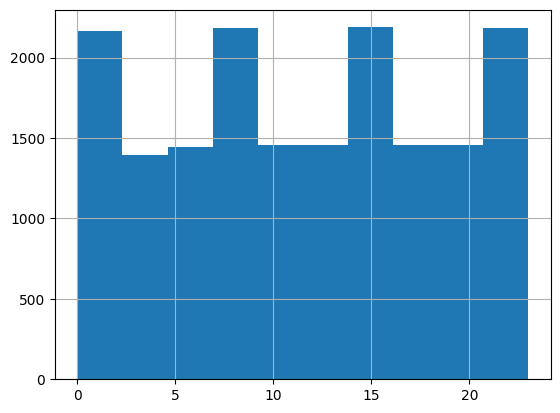

In [80]:
hour_df.hr.hist()

## Visualization & Explanatory Analysis

### Bagaimana distribusi total penggunaan sepeda per tahun?

In [81]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5,6,2011-01-06,Winter,2011,Jan,No,Thursday,Yes,Clear,1.604356,-0.608206,51.8261,6.000868,88,1518,1606
431,432,2012-03-07,Winter,2012,Mar,No,Wednesday,Yes,Clear,10.995849,9.416600,51.3333,23.167193,432,4484,4916
280,281,2011-10-08,Fall,2011,Oct,No,Saturday,No,Clear,16.518349,17.873972,70.1250,3.042081,2235,3174,5409
221,222,2011-08-10,Summer,2011,Aug,No,Wednesday,Yes,Clear,28.033349,29.208878,42.4167,13.417286,884,3896,4780
54,55,2011-02-24,Winter,2011,Feb,No,Thursday,Yes,Misty/Cloudy,5.895644,3.086606,69.7391,16.783232,100,1707,1807


C:\Users\USER\AppData\Local\Temp\ipykernel_16564\2676077858.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=['mnth', 'yr']).agg({


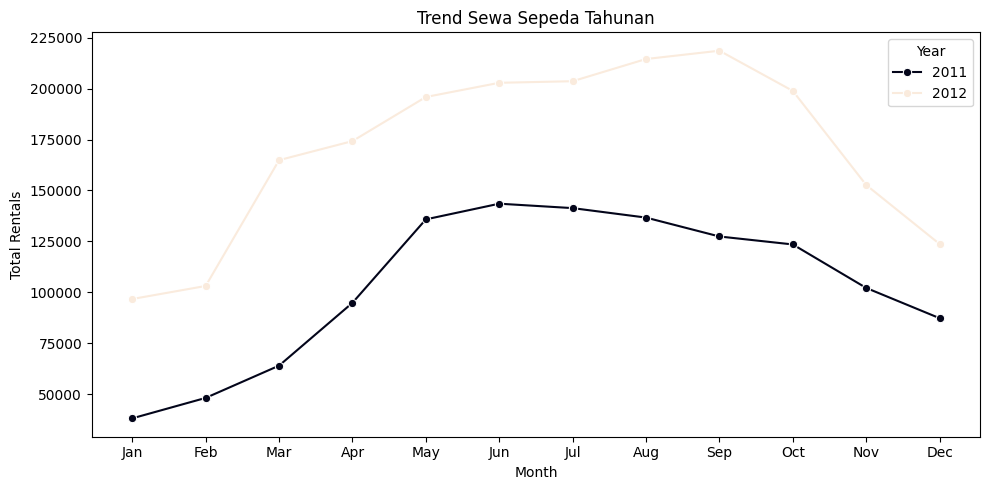

In [136]:
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=['mnth', 'yr']).agg({
    'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=monthly_counts,
    x='mnth',
    y='cnt',
    hue='yr',
    palette='rocket',
    marker='o'
)
plt.title('Trend Sewa Sepeda Tahunan')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

### Bagaimana penggunaan sepeda bervariasi di antara musim yang berbeda? Musim apa yang memiliki penggunaan sepeda terbanyak?

In [100]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
234,235,2011-08-23,Summer,2011,Aug,No,Tuesday,Yes,Clear,22.119151,24.000422,45.5417,9.833121,1281,4614,5895
652,653,2012-10-14,Fall,2012,Oct,No,Sunday,No,Clear,16.518349,17.541464,64.0417,18.667004,2080,4559,6639
85,86,2011-03-27,Spring,2011,Mar,No,Sunday,No,Misty/Cloudy,3.893021,0.522374,49.3913,12.348100,472,1221,1693
46,47,2011-02-16,Winter,2011,Feb,No,Wednesday,Yes,Clear,6.958267,4.869200,42.3478,16.869997,218,1897,2115
353,354,2011-12-20,Fall,2011,Dec,No,Tuesday,Yes,Misty/Cloudy,10.134151,10.165964,59.5417,4.125244,216,3534,3750


C:\Users\USER\AppData\Local\Temp\ipykernel_16564\2630989416.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = day_df.groupby(by=['season', 'yr']).agg({


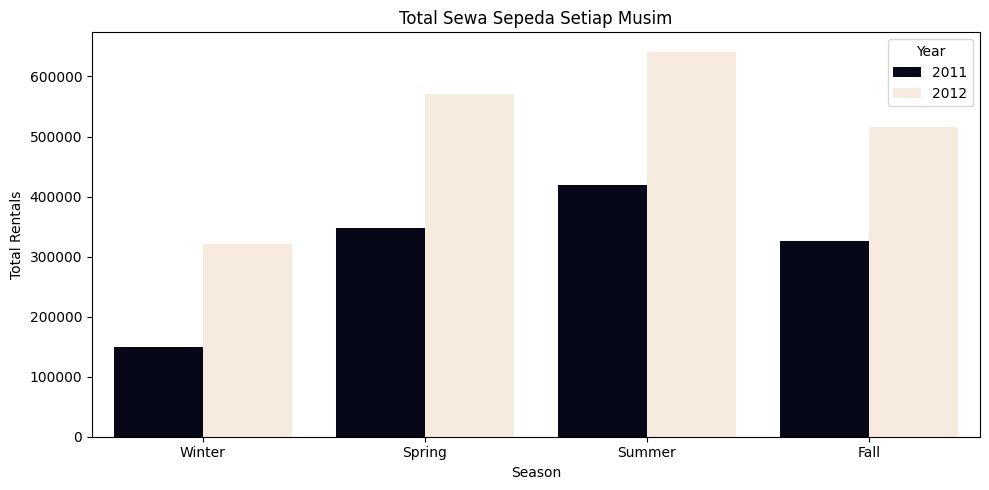

In [122]:
season_counts = day_df.groupby(by=['season', 'yr']).agg({
    'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(
    x='season', 
    y='cnt', 
    data=season_counts, 
    hue='yr',
    palette='rocket'
)

plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.title("Total Sewa Sepeda Setiap Musim")
plt.legend(title="Year", loc="upper right")
plt.tight_layout()
plt.show()

### Bagaimana penggunaan sepeda bervariasi di antara kondisi cuaca yang berbeda? Kondisi cuaca apa yang paling memengaruhi penggunaan sepeda?

In [112]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
23,24,2011-01-24,Winter,2011,Jan,No,Monday,Yes,Clear,-3.422609,-8.216620,49.1739,10.608110,86,1330,1416
293,294,2011-10-21,Fall,2011,Oct,No,Friday,Yes,Clear,12.092500,11.957336,57.4167,14.833532,676,3628,4304
190,191,2011-07-10,Summer,2011,Jul,No,Sunday,No,Clear,27.132500,29.541650,57.8333,12.292557,1743,3138,4881
350,351,2011-12-17,Fall,2011,Dec,No,Saturday,No,Misty/Cloudy,4.141651,0.458486,56.0833,16.292189,275,2464,2739
521,522,2012-06-05,Spring,2012,Jun,No,Tuesday,Yes,Misty/Cloudy,17.419151,18.708872,61.3333,14.041525,968,6033,7001


C:\Users\USER\AppData\Local\Temp\ipykernel_16564\3391416397.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = day_df.groupby(by=['weathersit', 'yr']).agg({


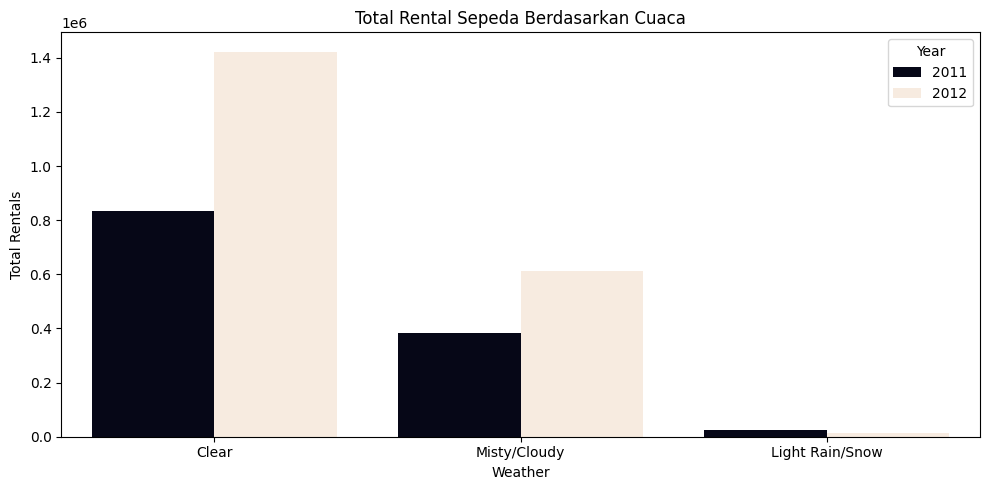

In [124]:
weather_counts = day_df.groupby(by=['weathersit', 'yr']).agg({
    'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(
    x='weathersit', 
    y='cnt', 
    data=weather_counts, 
    hue='yr',
    palette='rocket'
)

plt.xlabel("Weather")
plt.ylabel("Total Rentals")
plt.title("Total Rental Sepeda Berdasarkan Cuaca")
plt.legend(title="Year", loc="upper right")
plt.tight_layout()
plt.show()

### Apakah ada perbedaan dalam jam puncak penggunaan sepeda antara hari kerja dan akhir pekan?

In [114]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11551,11552,2012-05-01,Spring,2012,May,12,No,Tuesday,Yes,Misty/Cloudy,NaN,NaN,NaN,NaN,41,228,269
16874,16875,2012-12-10,Fall,2012,Dec,21,No,Monday,Yes,Misty/Cloudy,NaN,NaN,NaN,NaN,21,224,245
11688,11689,2012-05-07,Spring,2012,May,5,No,Monday,Yes,Clear,NaN,NaN,NaN,NaN,2,21,23
15294,15295,2012-10-04,Fall,2012,Oct,11,No,Thursday,Yes,Misty/Cloudy,NaN,NaN,NaN,NaN,38,176,214
16092,16093,2012-11-08,Fall,2012,Nov,6,No,Thursday,Yes,Clear,NaN,NaN,NaN,NaN,2,122,124


C:\Users\USER\AppData\Local\Temp\ipykernel_16564\1773550534.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


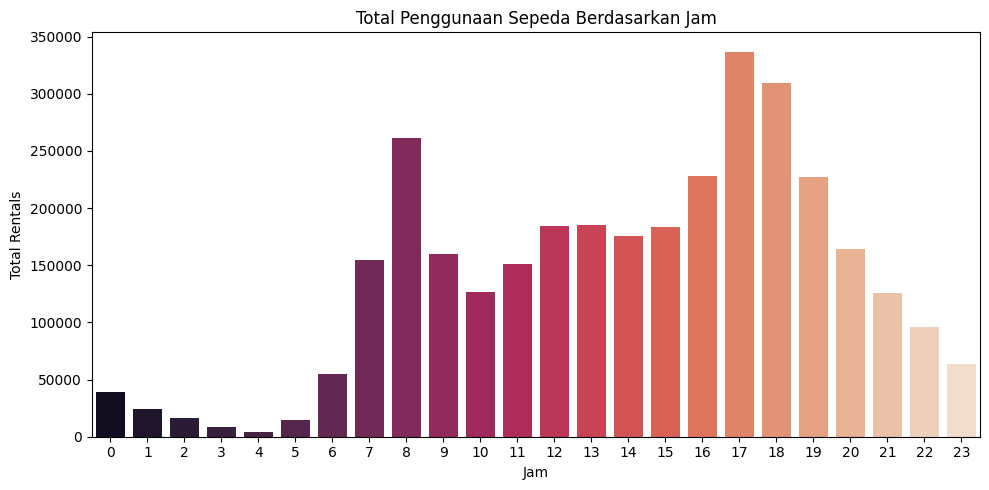

In [126]:
hour_counts = hour_df.groupby(by='hr').agg({
    'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(
    x='hr', 
    y='cnt', 
    data=hour_counts, 
    palette='rocket'
)

plt.xlabel("Jam")
plt.ylabel("Total Rentals")
plt.title("Total Penggunaan Sepeda Berdasarkan Jam")
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16564\2190439529.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_counts = hour_df.groupby(by=['hr', 'workingday']).agg({


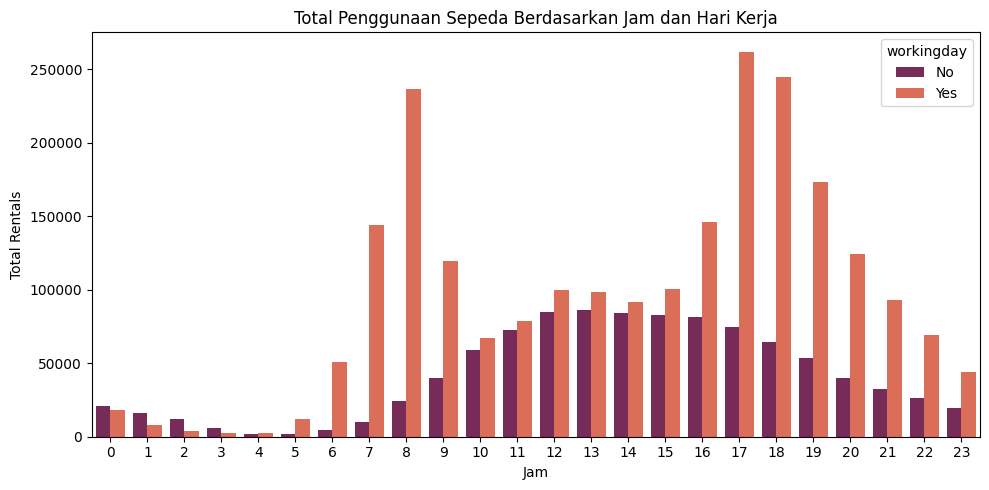

In [137]:
hour_counts = hour_df.groupby(by=['hr', 'workingday']).agg({
    'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(
    x='hr', 
    y='cnt', 
    data=hour_counts, 
    hue='workingday',
    palette='rocket'
)

plt.xlabel("Jam")
plt.ylabel("Total Rentals")
plt.title("Total Penggunaan Sepeda Berdasarkan Jam dan Hari Kerja")
plt.tight_layout()
plt.show()

## Conclusion

### Pertanyaan 1: Bagaimana distribusi total penggunaan sepeda per tahun?

Pada tahun 2011, terjadi peningkatan rental sepeda pada bulan Januari -Juni, kemudian turun secara perlahan sampai bulan Desember. Pada bulan Januari tahun 2012, tidak terdapat peningkatan yang signifikan dibanding bulan Desember tahun 2011. Namun, terdapat peningkatan yang meroket pada bulan Februari - Maret. Tren peningkatan ini berlangsung sampai dengan bulan September lalu turun signifikan pada bulan November dan Desember. Dari data tersebut, dapat diambil kesimpulan bahwasannya puncak rental pada tahun 2011 terjadi pada bulan Juni, sedangkan pada tahun 2012 terjadi pada bulan September.

### Pertanyaan 2: Bagaimana penggunaan sepeda bervariasi di antara musim yang berbeda? Musim apa yang memiliki penggunaan sepeda terbanyak?

Dari data diatas, perbedaan tahun tidak terjadi perubahan tren perentalan terhadap musim, hanya terjadi penambahan perental. Dengan tren perentalan berupa:
1. Summer
2. Spring
3. Fall
4. Winter

# Pertanyaan 3: Bagaimana penggunaan sepeda bervariasi di antara kondisi cuaca yang berbeda? Kondisi cuaca apa yang paling memengaruhi penggunaan sepeda?

Dari data yang diberikan, Cuaca cerah mendominasi perentalan sepeda, disusul cuaca berawan dan cuaca hujan ringan. Dapat terlihat bahwasannya perental sepeda cenderung merental sepeda pada kondisi cuaca yang cerah.

### Pertanyaan 4: Apakah ada perbedaan dalam jam puncak penggunaan sepeda antara hari kerja dan akhir pekan?

Pada hari kerja, mobilisasi transportasi sepeda berkisar antara pukul 10-19, sedangkan pada hari selain hari kerja, mobilisasi penggunaan sepeda terjadi sekitar pukul 7-9, dan pukul 16-20